<a href="https://colab.research.google.com/github/thesankalpagrawal/GRIP_Task2/blob/main/GRIP_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<u>Prediction using Unsupervised ML</u>**

###GRIP TASK 2 - Sankalp Agrawal


Importing necessary libraries :

In [34]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Uploading and Reading Dataset :


In [3]:
iris_dataset = pd.read_csv('Iris.csv')
iris_dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Data Analysis :

In [4]:
#Shape, Size and Dimensions of the Dataset

print('Shape of Dataset -', iris_dataset.shape)
print('Size of Dataset -', iris_dataset.size)
print('Dimensions of Dataset -', iris_dataset.ndim)

Shape of Dataset - (150, 6)
Size of Dataset - 900
Dimensions of Dataset - 2


In [5]:
#Descriptive Statistical Analysis of Dataset

iris_dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
#Basic Information of Rows and Columns of the Dataset

iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Information regarding the Species Column:

In [8]:
#Distinct classes in the species column

iris_dataset.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

Converting data of Species column to integers:

In [12]:
from pandas import get_dummies
dummy = get_dummies(iris_dataset.Species)
dummy.head()

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [21]:
#Replacing the Species Column

#removing the species column

iris_dataset = iris_dataset.drop(['Species'],axis=1)

In [22]:
#Concatenating the columns

new_iris = pd.concat([iris_dataset,dummy],axis=1)
new_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,5.1,3.5,1.4,0.2,1,0,0
1,2,4.9,3.0,1.4,0.2,1,0,0
2,3,4.7,3.2,1.3,0.2,1,0,0
3,4,4.6,3.1,1.5,0.2,1,0,0
4,5,5.0,3.6,1.4,0.2,1,0,0


Assigning Features and Labels:

In [55]:
#Assigning Features and getting information regarding it

X = new_iris.iloc[:,1:5]
print('Shape of Features -', X.shape)
print('Size of Features -', X.size)
print('Dimensions of Features -', X.ndim)

Shape of Features - (150, 4)
Size of Features - 600
Dimensions of Features - 2


**Finding Optimum Number of Clusters using Elbow Method**

In [56]:
#Finding Inertia at different number of clusters
wss = []
r = range(1,10)
for i in r:
  k = KMeans(n_clusters=i)
  k.fit(X)
  wssi = k.inertia_
  wss.append(wssi)
print(wss)

[680.8244, 152.36870647733906, 78.94084142614602, 57.31787321428571, 46.53558205128205, 38.930963049671746, 34.30776223776224, 29.955568877177576, 28.059735543844244]


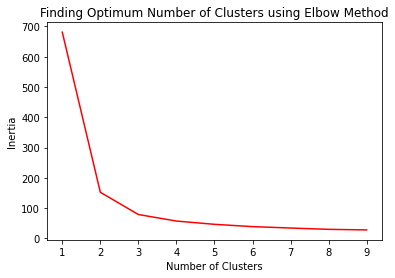

In [57]:
#Visualizing and determining optimum number of cluster
plt.plot(r,wss,color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Finding Optimum Number of Clusters using Elbow Method')
plt.show()

From above Visualization, We can clearly see that there is not significant change in Inertia after '3' which the point of elbow. Therefore the minimum number of clusters shall be 3.

Creating and Feeding the Model

In [58]:
Task2_model = KMeans(n_clusters=3)
Task2_model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Prediction using the Model

In [63]:
Class_pred = Task2_model.labels_
Class_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [60]:
Task2_model.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

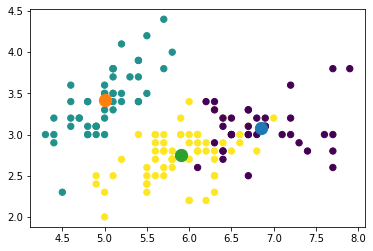

In [81]:
#Visualization of the Model with first 2 columns

plt.scatter(X.SepalLengthCm,X.SepalWidthCm,40,Class_pred)
for i in Task2_model.cluster_centers_:
  plt.scatter(i[0],i[1],150)
plt.show()